In [1]:
import requests
import pythainlp
from pythainlp.corpus.common import thai_stopwords
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
r = requests.get("https://publicapi.traffy.in.th/share/teamchadchart/search?limit=null")
result = r.json()
# print(len(result["results"]))

df = pd.DataFrame(result["results"])
# df.shape[0]
# add index as a new column
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'id'})
df.head()

,id,id,type,org,comment,ticket_id,coords,photo,after_photo,address,district,subdistrict,province,timestamp,state
0,0,121937,ทางเท้า,เพื่อนชัชชาติ,แจ้งหน่วยงานที่เกี่ยวข้องที่รับผิดชอบครับ\n.ตร...,2022-FEWGGN,"[100.471275, 13.75112]",https://storage.googleapis.com/traffy_public_b...,,192/15 ถนน จรัญสนิทวงศ์ แขวง บ้านช่างหล่อ เขตบ...,บางกอกน้อย,บ้านช่างหล่อ,กรุงเทพมหานคร,2022-07-05 04:17:17.497545+00,รอรับเรื่อง
1,1,121936,อื่นๆ,เพื่อนชัชชาติ,ไม่มีทางเท้าจากการก่อสร้าง,2022-3G8KY3,"[100.558963547156, 13.8229417274785]",https://storage.googleapis.com/traffy_public_b...,,1010 อาคาร ชินวัตร 3 ถนน วิภาวดีรังสิต แขวง จต...,จตุจักร,จตุจักร,กรุงเทพมหานคร,2022-07-05 04:16:38.52866+00,รอรับเรื่อง
2,2,121935,อื่นๆ,เพื่อนชัชชาติ,แก้ไขไฟจราจรคะ ตอนนี้คือแยกนี้วัดความเสียงกัน...,2022-DCQ9VY,"[100.519931, 13.742883]",https://storage.googleapis.com/traffy_public_b...,,75 ถนน จรัสเมือง แขวง รองเมือง เขตปทุมวัน กรุง...,ปทุมวัน,รองเมือง,กรุงเทพมหานคร,2022-07-05 04:16:06.542199+00,รอรับเรื่อง
3,3,121934,อื่นๆ,เพื่อนชัชชาติ,ไฟถนนเสีย ถนนศรีนครินทร์ ปากซอยศรีนครินทร์ 46,2022-736MZE,"[100.64656, 13.686151]",https://storage.googleapis.com/traffy_public_b...,,214 ถนน ศรีนครินทร์ แขวง หนองบอน เขต ประเวศ กร...,ประเวศ,หนองบอน,กรุงเทพมหานคร,2022-07-05 04:16:00.425211+00,รอรับเรื่อง
4,4,121933,อื่นๆ,เพื่อนชัชชาติ,ขยะส่งกลิ่นเน่าเหม็น เจ้าของพื้นที่ไม่ดูแล พื้...,2022-BTRYPK,"[100.609221, 13.658744]",https://storage.googleapis.com/traffy_public_b...,,42 ลาซาล 8 แขวง บางนา เขตบางนา กรุงเทพมหานคร 1...,บางนา,บางนาใต้,กรุงเทพมหานคร,2022-07-05 04:15:42.207263+00,รอรับเรื่อง


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   id           1000 non-null   object
 2   type         1000 non-null   object
 3   org          1000 non-null   object
 4   comment      1000 non-null   object
 5   ticket_id    1000 non-null   object
 6   coords       1000 non-null   object
 7   photo        1000 non-null   object
 8   after_photo  1000 non-null   object
 9   address      1000 non-null   object
 10  district     1000 non-null   object
 11  subdistrict  1000 non-null   object
 12  province     1000 non-null   object
 13  timestamp    1000 non-null   object
 14  state        1000 non-null   object
dtypes: int64(1), object(14)
memory usage: 117.3+ KB


In [4]:
text = ''
for t in df['comment']:
    text += t
text

'แจ้งหน่วยงานที่เกี่ยวข้องที่รับผิดชอบครับ\n.ตรงซอยจรัญสนิทวงศ์28\nพบฝาท่อระบายน้ำชำรุด.จนเกิดเป็นหลุมต่างระดับ.ก่อนหน้านี้ชาวบ้านสันจรเกิดอุบัติสะดุดล้มหลายครั้งแล้วครับ.จึงแจ้งมายังหน่วยงานที่รับผิดชอบช่วยดำเนินการแก้ไขด้วยครับไม่มีทางเท้าจากการก่อสร้างแก้ไขไฟจราจรคะ  ตอนนี้คือแยกนี้วัดความเสียงกันไปเลยคะ ไฟเสียไม่มีหน่วยงานเข้ามาดูแลไฟถนนเสีย ถนนศรีนครินทร์ ปากซอยศรีนครินทร์ 46ขยะส่งกลิ่นเน่าเหม็น เจ้าของพื้นที่ไม่ดูแล พื้นที่บริเวณนี้ได้มีการแจ้งเข้าระบบเพื่อให้มีการแก้ไขไปแล้ว 1ครั้ง หลังจากการส่งแจ้งปัญหาไป ได้มีเจ้าหน้าที่เข้ามาทำกวาดให้ขยะมากองรวมกัน และไม่ได้เก็บขยะหรือทำความสะอาดพื้นที่ แต่ถ่ายรูปของพื้นที่ฝั่งตรงข้ามซึ่งสะอาดอยู่แล้วมาใส่ในระบบ และแจ้งว่าดำเนินการแก้ปัญหาแล้ว อยากให้มีการแก้ปัญหาที่แท้จริงเกิดขึ้นครับ ตอนนี้พื้นที่บริเวณนี้ส่งกลิ่นเน่าเหม็น และเป็นที่เพาะยุง เนื่องจากมีน้ำขังครับอยากให้ปรับปรุงแอพ bkk connectสายไฟฟ้าไฟถนนเสีย ถนนศรีนครินทร์ขาเข้า ก่อนถึงแยกเข้าสวนหลวง ร.9ทางเท้าไม่มีเดินพื้นที่รกร้าง มีต้นไม้ขึ้นเป็นจำนวนมากแต่ไม่มีผู้มาตัดและดูแล ทำให้เป็นท

In [5]:
text_tokens = pythainlp.tokenize.word_tokenize(text)
text_tokens

['แจ้ง',
 'หน่วยงาน',
 'ที่',
 'เกี่ยวข้อง',
 'ที่',
 'รับผิดชอบ',
 'ครับ',
 '\n',
 '.',
 'ตรง',
 'ซอย',
 'จรัญสนิทวงศ์',
 '28',
 '\n',
 'พบ',
 'ฝา',
 'ท่อระบายน้ำ',
 'ชำรุด',
 '.จน',
 'เกิด',
 'เป็น',
 'หลุม',
 'ต่าง',
 'ระดับ',
 '.',
 'ก่อนหน้านี้',
 'ชาวบ้าน',
 'สัน',
 'จร',
 'เกิด',
 'อุบัติ',
 'สะดุด',
 'ล้ม',
 'หลายครั้ง',
 'แล้ว',
 'ครับ',
 '.',
 'จึง',
 'แจ้ง',
 'มายัง',
 'หน่วยงาน',
 'ที่',
 'รับผิดชอบ',
 'ช่วย',
 'ดำเนินการ',
 'แก้ไข',
 'ด้วย',
 'ครับ',
 'ไม่',
 'มี',
 'ทางเท้า',
 'จาก',
 'การ',
 'ก่อสร้าง',
 'แก้ไข',
 'ไฟจราจร',
 'คะ',
 '  ',
 'ตอนนี้',
 'คือ',
 'แยก',
 'นี้',
 'วัด',
 'ความ',
 'เสียง',
 'กัน',
 'ไป',
 'เลย',
 'คะ',
 ' ',
 'ไฟ',
 'เสีย',
 'ไม่',
 'มี',
 'หน่วยงาน',
 'เข้ามา',
 'ดูแล',
 'ไฟถนน',
 'เสีย',
 ' ',
 'ถนน',
 'ศรีนครินทร์',
 ' ',
 'ปากซอย',
 'ศรีนครินทร์',
 ' ',
 '46',
 'ขยะ',
 'ส่งกลิ่น',
 'เน่าเหม็น',
 ' ',
 'เจ้าของ',
 'พื้นที่',
 'ไม่',
 'ดูแล',
 ' ',
 'พื้นที่',
 'บริเวณ',
 'นี้',
 'ได้',
 'มี',
 'การ',
 'แจ้ง',
 'เข้า',
 'ระบบ',
 'เพื่อให้',
 

In [6]:
join_tokens_text = " ".join(text_tokens)

join_tokens_text

'แจ้ง หน่วยงาน ที่ เกี่ยวข้อง ที่ รับผิดชอบ ครับ \n . ตรง ซอย จรัญสนิทวงศ์ 28 \n พบ ฝา ท่อระบายน้ำ ชำรุด .จน เกิด เป็น หลุม ต่าง ระดับ . ก่อนหน้านี้ ชาวบ้าน สัน จร เกิด อุบัติ สะดุด ล้ม หลายครั้ง แล้ว ครับ . จึง แจ้ง มายัง หน่วยงาน ที่ รับผิดชอบ ช่วย ดำเนินการ แก้ไข ด้วย ครับ ไม่ มี ทางเท้า จาก การ ก่อสร้าง แก้ไข ไฟจราจร คะ    ตอนนี้ คือ แยก นี้ วัด ความ เสียง กัน ไป เลย คะ   ไฟ เสีย ไม่ มี หน่วยงาน เข้ามา ดูแล ไฟถนน เสีย   ถนน ศรีนครินทร์   ปากซอย ศรีนครินทร์   46 ขยะ ส่งกลิ่น เน่าเหม็น   เจ้าของ พื้นที่ ไม่ ดูแล   พื้นที่ บริเวณ นี้ ได้ มี การ แจ้ง เข้า ระบบ เพื่อให้ มี การ แก้ไข ไป แล้ว   1 ครั้ง   หลังจาก การ ส่ง แจ้ง ปัญหา ไป   ได้ มี เจ้าหน้าที่ เข้ามา ทำ กวาด ให้ ขยะ มา กอง รวมกัน   และ ไม่ ได้ เก็บ ขยะ หรือ ทำความสะอาด พื้นที่   แต่ ถ่ายรูป ของ พื้นที่ ฝั่ง ตรงข้าม ซึ่ง สะอาด อยู่แล้ว มา ใส่ ใน ระบบ   และ แจ้ง ว่า ดำเนิน การแก้ปัญหา แล้ว   อยาก ให้ มี การแก้ปัญหา ที่ แท้จริง เกิดขึ้น ครับ   ตอนนี้ พื้นที่ บริเวณ นี้ ส่งกลิ่น เน่าเหม็น   และ เป็นที่ เพาะ ยุง   เนื่องจาก มี น้ำ ข

In [7]:
new_text = re.sub(r'\n', '', join_tokens_text)
new_text

'แจ้ง หน่วยงาน ที่ เกี่ยวข้อง ที่ รับผิดชอบ ครับ  . ตรง ซอย จรัญสนิทวงศ์ 28  พบ ฝา ท่อระบายน้ำ ชำรุด .จน เกิด เป็น หลุม ต่าง ระดับ . ก่อนหน้านี้ ชาวบ้าน สัน จร เกิด อุบัติ สะดุด ล้ม หลายครั้ง แล้ว ครับ . จึง แจ้ง มายัง หน่วยงาน ที่ รับผิดชอบ ช่วย ดำเนินการ แก้ไข ด้วย ครับ ไม่ มี ทางเท้า จาก การ ก่อสร้าง แก้ไข ไฟจราจร คะ    ตอนนี้ คือ แยก นี้ วัด ความ เสียง กัน ไป เลย คะ   ไฟ เสีย ไม่ มี หน่วยงาน เข้ามา ดูแล ไฟถนน เสีย   ถนน ศรีนครินทร์   ปากซอย ศรีนครินทร์   46 ขยะ ส่งกลิ่น เน่าเหม็น   เจ้าของ พื้นที่ ไม่ ดูแล   พื้นที่ บริเวณ นี้ ได้ มี การ แจ้ง เข้า ระบบ เพื่อให้ มี การ แก้ไข ไป แล้ว   1 ครั้ง   หลังจาก การ ส่ง แจ้ง ปัญหา ไป   ได้ มี เจ้าหน้าที่ เข้ามา ทำ กวาด ให้ ขยะ มา กอง รวมกัน   และ ไม่ ได้ เก็บ ขยะ หรือ ทำความสะอาด พื้นที่   แต่ ถ่ายรูป ของ พื้นที่ ฝั่ง ตรงข้าม ซึ่ง สะอาด อยู่แล้ว มา ใส่ ใน ระบบ   และ แจ้ง ว่า ดำเนิน การแก้ปัญหา แล้ว   อยาก ให้ มี การแก้ปัญหา ที่ แท้จริง เกิดขึ้น ครับ   ตอนนี้ พื้นที่ บริเวณ นี้ ส่งกลิ่น เน่าเหม็น   และ เป็นที่ เพาะ ยุง   เนื่องจาก มี น้ำ ขัง ค

In [8]:
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabun.ttf'

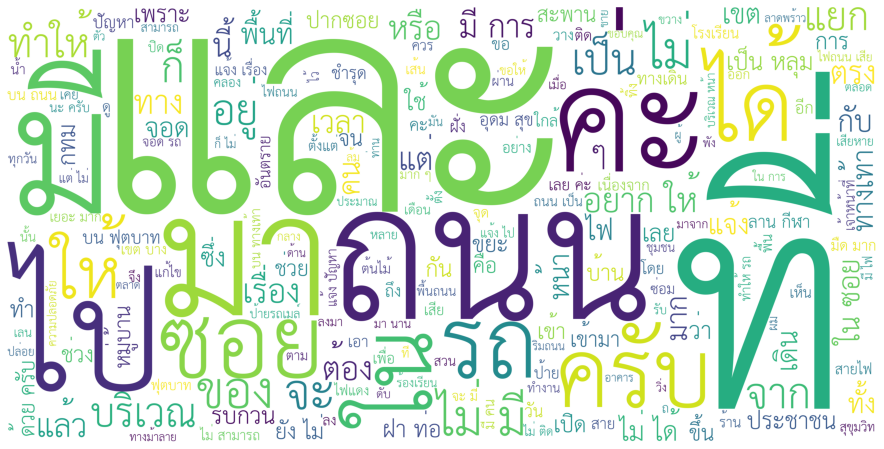

In [23]:
wordcloud = WordCloud(background_color = 'white',font_path=fp,max_words=200, height = 2000, width=4000, regexp=reg)
wordcloud.generate(new_text)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
ts = list(thai_stopwords())
ts

['นางสาว',
 'ทั้งที่',
 'คราวหลัง',
 'ทาง',
 'นอกจากนั้น',
 'มอง',
 'ที่แท้',
 'ผ่าน',
 'เป็นเพราะ',
 'เกินๆ',
 'แค่นั้น',
 'ภายใน',
 'หลังจาก',
 'ฯล',
 'ส่วนเกิน',
 'ซะจนกระทั่ง',
 'ไว้',
 'นั่นเอง',
 'คิดว่า',
 'ส่วนน้อย',
 'คล้ายกัน',
 'พอเพียง',
 'ฯ',
 'ยาว',
 'จวบจน',
 'อาจเป็นด้วย',
 'แต่ทว่า',
 'ผู้',
 'ให้',
 'เกี่ยวกับ',
 'จำ',
 'พวกนี้',
 'ช่วงต่อไป',
 'เสีย',
 'แต่เดิม',
 'เหตุนี้',
 'ยิ่งจะ',
 'ตั้งแต่',
 'ตลอดไป',
 'เฉพาะ',
 'พา',
 'ระยะ',
 'มั้ยล่ะ',
 'แล้วเสร็จ',
 'พอเหมาะ',
 'เกือบๆ',
 'เท่าที่',
 'ถ้าจะ',
 'ถูกต้อง',
 'พึง',
 'แท้',
 'เสร็จสมบูรณ์',
 'เอ็ง',
 'เสียจน',
 'ที่จริง',
 'นอกเหนือจาก',
 'มีแต่',
 'ถึงแก่',
 'ตน',
 'ช่วย',
 'จับ',
 'นับแต่',
 'หน่อย',
 'ต่าง',
 'ครั้งกระนั้น',
 'ครานี้',
 'พอที่',
 'คราวละ',
 'อย่างใด',
 'จวบกับ',
 'ยอมรับ',
 'บางที่',
 'เช่น',
 'รึว่า',
 'คราว',
 'แห่งไหน',
 'เท่านี้',
 'แห่งนั้น',
 'ด้วยว่า',
 'ซึ่งก็',
 'นอกนั้น',
 'มั้ยนั่น',
 'นัก',
 'จง',
 'เป็นที่',
 'กล่าว',
 'สําหรับ',
 'ที่นั้น',
 'ร่วมกัน',
 'เป็นที่สุด',
 'จำพวก',

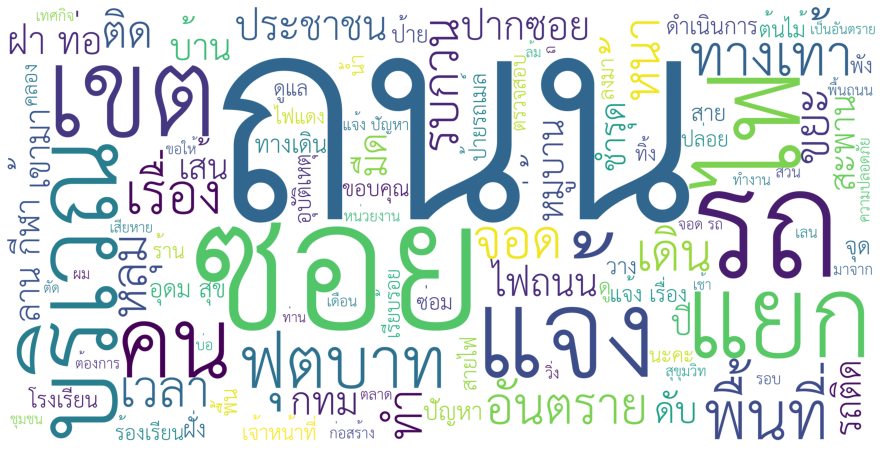

In [11]:
wordcloud = WordCloud(stopwords=ts, background_color = 'white',font_path=fp,max_words=100, height = 2000, width=4000, regexp=reg)
wordcloud.generate(new_text)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
word_count = {}
for wc in text_tokens:
    word_count[wc] = word_count.get(wc,0) + 1

In [13]:
table = pd.DataFrame([word_count],index=['count']).transpose()
table = table.sort_values('count',ascending=False).reset_index()
table.columns = ['word','count']
table

,word,count
0,,4041
1,ไม่,568
2,\n,520
3,มี,492
4,ถนน,375
...,...,...
3720,แม้,1
3721,ฑล,1
3722,มน,1
3723,พุทธ,1


In [14]:
word_table = table[table['word'].str.contains(reg)]
word_table

,word,count
1,ไม่,568
3,มี,492
4,ถนน,375
5,ที่,351
6,และ,329
...,...,...
3720,แม้,1
3721,ฑล,1
3722,มน,1
3723,พุทธ,1


In [15]:
word_table.sum(axis=0)

word     ไม่มีถนนที่และให้มาซอยครับค่ะในเป็นรถไปการได้ม...
count                                                24592
dtype: object

In [16]:
result_table = word_table[~word_table['word'].isin(ts)]
result_table

,word,count
4,ถนน,375
9,ซอย,260
14,รถ,217
20,แจ้ง,159
23,ไฟ,132
...,...,...
3717,ในอนาคต,1
3721,ฑล,1
3722,มน,1
3723,พุทธ,1


In [17]:
result_table.sum(axis=0)

word     ถนนซอยรถแจ้งไฟเขตจอดคนแยกบริเวณเรื่องหน้าฟุตบา...
count                                                14342
dtype: object

In [18]:
from pythainlp.tokenize import syllable_tokenize


In [19]:
token_syllable = []
for w in text_tokens:
    token_syllable.append(len(syllable_tokenize(w)))
token_syllable

[1,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,


In [20]:
syllable_table = pd.DataFrame([text_tokens,token_syllable],index=['word','syllable']).transpose()
syllable_2_table = syllable_table[syllable_table['syllable']==2]
syllable_2_table

,word,syllable
1,หน่วยงาน,2
3,เกี่ยวข้อง,2
17,ชำรุด,2
23,ระดับ,2
26,ชาวบ้าน,2
...,...,...
30515,วันนี้,2
30547,ภายใน,2
30550,ประมาณ,2
30571,สำหรับ,2


In [21]:
syllable_2_text = " ".join(list(syllable_2_table['word'].values))
syllable_2_text

'หน่วยงาน เกี่ยวข้อง ชำรุด ระดับ ชาวบ้าน อุบัติ สะดุด หลายครั้ง มายัง หน่วยงาน แก้ไข ทางเท้า ก่อสร้าง แก้ไข ตอนนี้ หน่วยงาน เข้ามา ดูแล ไฟถนน ปากซอย ส่งกลิ่น เน่าเหม็น เจ้าของ พื้นที่ ดูแล พื้นที่ บริเวณ ระบบ เพื่อให้ แก้ไข หลังจาก ปัญหา เข้ามา รวมกัน พื้นที่ ถ่ายรูป พื้นที่ ตรงข้าม สะอาด อยู่แล้ว ระบบ ดำเนิน แท้จริง เกิดขึ้น ตอนนี้ พื้นที่ บริเวณ ส่งกลิ่น เน่าเหม็น เป็นที่ เนื่องจาก ปรับปรุง ไฟถนน ขาเข้า ทางเท้า พื้นที่ รกร้าง ต้นไม้ ดูแล ทำให้ ที่อยู่ จรจัด ที่อยู่ มีพิษ ดูแล เรียบร้อย จัดการ พื้นที่ ดังกล่าว รูปธรรม เปลี่ยนเป็น พื้นที่ สามารถ เรียบร้อย กลับมา จบสิ้น ทางเท้า อันตราย สายไฟ ทางเท้า ตลอดทาง แนวทาง ขับขี่ ทางเท้า เวลา ฟุตบาท สามารถ รู้สึก ขอบคุณ ฟุตบาท สายไฟ ลงมา โตงเตง ปากซอย สาธุ ประดิษฐ์ เจ้าหน้า ที่มา ทำการ ปล่อยทิ้ง เอาไว้ อันต รายได้ ไฟถนน กานดา ภายใต้ ดูแล เพชรเกษม นวรัตน์ บำรุง สัญญา ดูแล บำรุง เลือกตั้ง จะแจ้ง หน่วยงาน โชคดี ชัชชาติ ร้องเรียน ขอบคุณ ทางเท้า ไฟถนน ขาเข้า มาสด้า ทางเท้า สมบูรณ์ ระดับ ไฟแดง มหากาฬ พร้อมกัน ปลอดภัย แบบนี้ ได้รับ แก้ไข สักที ตำแหน่ง 

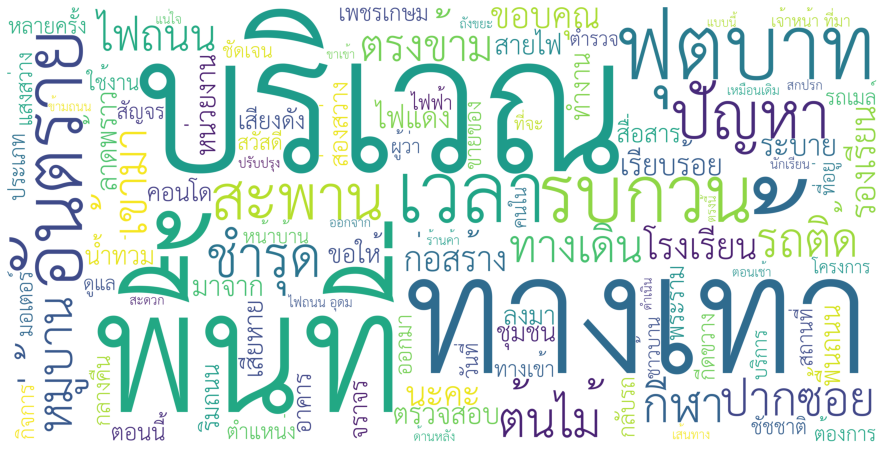

In [24]:
wordcloud = WordCloud(stopwords=ts, background_color = 'white',font_path=fp,max_words=100, height = 2000, width=4000, regexp=reg)
wordcloud.generate(syllable_2_text)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()